In [22]:

import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt


import warnings
warnings.filterwarnings('ignore')


In [23]:
raw = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Experiments/Experiment2/data/data.csv')

In [24]:
# some preprocessing


df = raw[raw['sender'] == 'Stimulus']                               # get only rows with RT data
df = df[df['correct'] == True]                                      # get only correct responses

data = df[['sender', 'url', 'duration', 'condition']].copy()        # get only the columns we need


data_agg = df.groupby(['url', 'condition']).mean().reset_index()    # get aggregated data (RT means per participant per condition)
data_agg.head()

,url,condition,Unnamed: 0,duration,time_run,time_render,time_show,time_end,time_commit,time_switch,counterbalance,Unnamed: 17
0,2225,Filler,188.600000,742.948000,115093.915000,115089.456000,115106.122000,115849.070000,115852.340000,115868.591500,1.0,NaN
1,2225,Nonword,166.200000,704.715200,105423.140000,105419.033800,105435.699800,106140.415000,106145.090000,106160.670800,1.0,NaN
2,2225,Related,164.545455,598.352455,105002.818182,104998.227000,105014.893000,105613.245455,105616.427273,105632.292545,1.0,NaN
3,2225,Unrelated,153.500000,757.481125,100174.556250,100170.590375,100187.256375,100944.737500,100948.012500,100963.267000,1.0,NaN
4,2226,Filler,213.250000,640.613000,125703.037500,125700.021000,125716.687000,126357.300000,126364.425000,126377.077250,1.0,NaN


<Axes: xlabel='condition', ylabel='duration'>

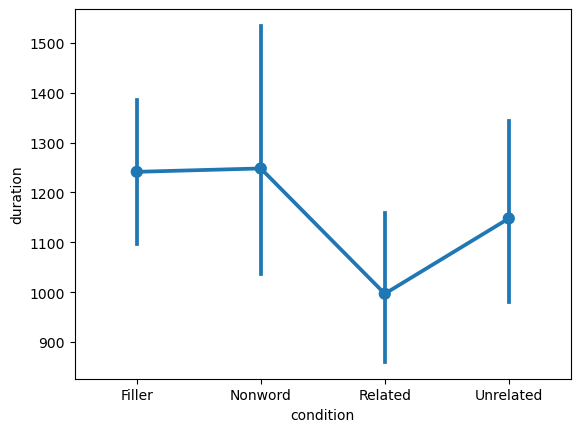

In [25]:
# inspect the data

sns.pointplot(data = data_agg, x='condition', y = 'duration')

In [26]:
# Remove filler trials
data_agg = data_agg[data_agg['condition'] != 'Filler']

<Axes: xlabel='condition', ylabel='duration'>

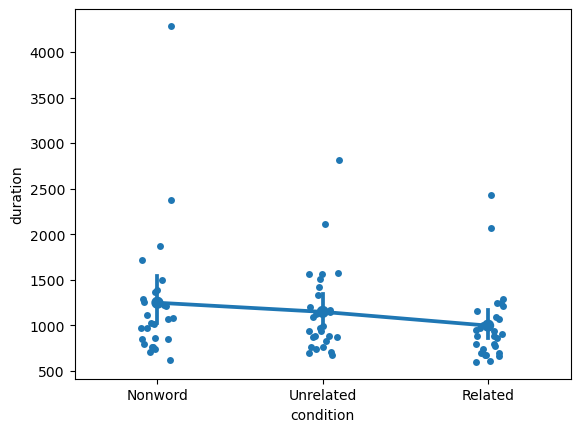

In [27]:
# Look at the means together with the actual datapoints

order = ['Nonword', 'Unrelated', 'Related']                                     # define the order we want the x-axis categories to have
sns.pointplot(data = data_agg, x='condition', y = 'duration', order=order)
sns.stripplot(data = data_agg, x='condition', y = 'duration', order=order)

<Axes: xlabel='condition', ylabel='duration'>

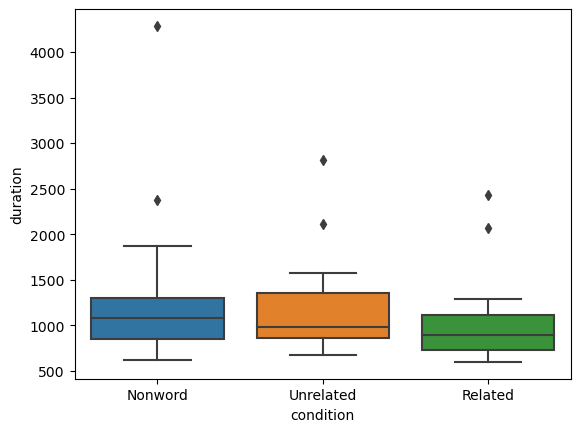

In [28]:
# Remove outliers

# looking at boxplots is one way to identify outliers
sns.boxplot(data = data_agg, x='condition', y = 'duration', order=order)


In [29]:
# Seaborn uses interquartile range by default to find outliers. You can get the exact numbers like this:

Q1 = data_agg['duration'].quantile(0.25)
Q3 = data_agg['duration'].quantile(0.75)
    
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)
print('Outliers:', Q1 - (1.5 * IQR), Q3 + (1.5 * IQR))

Q1: 796.3144155844159
Q3: 1250.7111053230788
IQR: 454.3966897386629
Outliers: 114.71938097642158 1932.3061399310732


<Axes: xlabel='condition', ylabel='duration'>

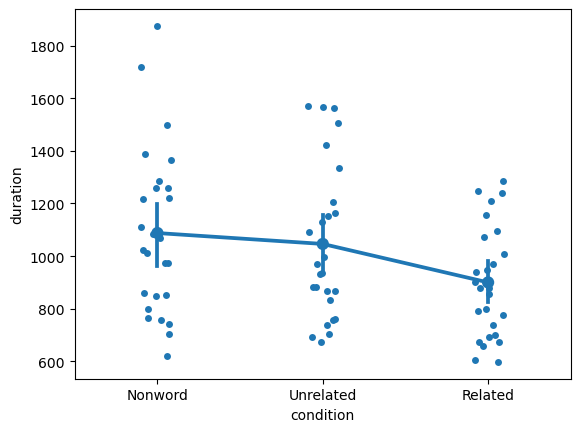

In [30]:

# get only RT's less than 2 seconds
data_agg = data_agg[data_agg['duration'] < 2000]

order = ['Nonword', 'Unrelated', 'Related']
sns.pointplot(data = data_agg, x='condition', y = 'duration', order=order)
sns.stripplot(data = data_agg, x='condition', y = 'duration', order=order)

Our experiment 2 was based on the first experiment in:

Besner, D., Smith, M. C., & MacLeod, C. M. (1990). Visual word recognition: A dissociation of lexical and semantic processing. _Journal of Experimental Psychology: Learning, Memory, and Cognition, 16_(5), 862.

If we find the same results that they did, our results should look something like the results reported in their Table 1:

<img src="https://github.com/ethanweed/ExPsyLing/blob/master/Slides/Images/Besner%20et%20al_1990_Table%201.png?raw=true" width=""/>

In [40]:
related = round(data_agg[data_agg['condition'] == 'Related']['duration'].mean())
unrelated = round(data_agg[data_agg['condition'] == 'Unrelated']['duration'].mean())
nonwords = round(data_agg[data_agg['condition'] == 'Nonword']['duration'].mean())

print('Related:', related)
print('Unrelated:', unrelated)
print('Nonwords:', nonwords)

Related: 900
Unrelated: 1046
Nonwords: 1088


Mean RT

| Study               | Related | Unrelated | Nonwords |
|---------------------|---------|-----------|----------|
| Besner et al (1990) | 685     | 804       | 765      |
| ExPsyLing (2024)    | 900     | 1046      | 1088     |


Differences in mean RT

| Study               | R-U  | R-N  | U-N |
|---------------------|------|------|-----|
| Besner et al (1990) | -119 | -80  | 39  |
| ExPsyLing (2024)    | -146 | -188 | -42 |